# Lexical Richness Index (LRI)

In [1]:
# Import required modules

# Lexical Richness module
# Documentation: https://pypi.org/project/lexicalrichness/
from lexicalrichness import LexicalRichness

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from collections import Counter

import random

## John Locke

In [2]:
with open("FullText/LockeComplete.txt", "r", encoding="utf-8") as file:
    Locke = file.read()

len(Locke)

2040978

In [3]:
# LRI of full text
locke = LexicalRichness(Locke)

print("Lexical Richness of John Locke")

# Return (unique) word count
print("Unique Word Count: %s" % locke.terms)

# Return Type Token Ratio (TTR) of text
print("Type Token Ratio: %s" % locke.ttr)

# Return Root Type Token Ratio (RTTR) of text
print("Root Type Token Ratio: %s" % locke.rttr)

# Return Corrected Type Token Ratio (CTTR) of text
print("Corrected Type Token Ratio: %s" % locke.cttr)

# Return Mean Segmental Type Token Ratio (MSTTR) of text
print("Mean Segmental Type Token Ratio: %s" % locke.msttr(segment_window=25))

# Return Moving Average Type Token Ratio (MATTR) of text
print("Moving Average Type Token Ratio: %s" % locke.mattr(window_size=25))

# Return Measure of Textual Lexical Diversity (MTLD)
print("Measure of Textual Lexical Diversity: %s" % locke.mtld(threshold=0.72))

# Return hypergeometric distribution diversity (HD-D) measure.
print("Hypergeometric Distribution Diversity: %s" % locke.hdd(draws=42))

Lexical Richness of John Locke
Unique Word Count: 8800
Type Token Ratio: 0.022749305241388226
Root Type Token Ratio: 14.148988872856478
Corrected Type Token Ratio: 10.00484597892982
Mean Segmental Type Token Ratio: 0.8591416752843168
Moving Average Type Token Ratio: 0.8593303533353228
Measure of Textual Lexical Diversity: 56.95987689180785
Hypergeometric Distribution Diversity: 0.8255656836997587


### LRI Mean Average Function

In [4]:
# For accurate comparison, Jockers recommends comparing random 10,000 word chunks of each corpus
# Use without stopwords as all vocabulary matters here
# Build a function to select 10,000 random words and find mean average of multiple LRIs
def LRI (times, text):
    
    # Empty variables for LRI mean averages
    UWQavg = []
    TTRavg = []
    RTTRavg = []
    CTTRavg = []
    MSTTRavg = []
    MATTRavg = []
    MTLDavg = []
    HDDavg = []
    
    # Tokenize text for randomization with NLTK
    textToke = nltk.word_tokenize(text)
    
    # Iterate through the function multiple times
    for i in range(times):
        
        # Pick 10000 random words via RANDOM
        textRand = random.sample(textToke, 10000)
    
        # Convert back to string
        textStr = ' '.join(textRand)
    
        # Perform LRI with LexicalRichness
        textLRI = LexicalRichness(textStr)
    
        # Unique Word Count
        UWQ = textLRI.terms
        # Type Token Ratio 
        TTR = textLRI.ttr
        # Root Type Token Ratio 
        RTTR = textLRI.rttr
        # Corrected Type Token Ratio 
        CTTR = textLRI.cttr
        # Mean Segmental Type Token Ratio 
        MSTTR = textLRI.msttr(segment_window=25)
        # Return Moving Average Type Token Ratio (MATTR) of text
        MATTR = textLRI.mattr(window_size=25)
        # Measure of Textual Lexical Diversity 
        MTLD = textLRI.mtld(threshold=0.72)
        # Hypergeometric Distribution Diversity measure
        HDD = textLRI.hdd(draws=42)
        
        # Append results for mean average
        UWQavg.append(UWQ)
        TTRavg.append(TTR)
        RTTRavg.append(RTTR)
        CTTRavg.append(CTTR)
        MSTTRavg.append(MSTTR)
        MATTRavg.append(MATTR)
        MTLDavg.append(MTLD)
        HDDavg.append(HDD)
                                         # Average results, round to 2 decimal places
    print("Unique Word Count: %s" % round(sum(UWQavg)/len(UWQavg), 2))
    print("Type Token Ratio: %s" % round(sum(TTRavg)/len(TTRavg), 2))
    print("Root Type Token Ratio: %s" % round(sum(RTTRavg)/len(RTTRavg), 2))
    print("Corrected Type Token Ratio: %s" % round(sum(CTTRavg)/len(CTTRavg), 2))
    print("Mean Segmental Type Token Ratio: %s" % round(sum(MSTTRavg)/len(MSTTRavg), 2))
    print("Moving Average Type Token Ratio: %s" % round(sum(MATTRavg)/len(MATTRavg), 2))
    print("Measure of Textual Lexical Diversity: %s" % round(sum(MTLDavg)/len(MTLDavg), 2))
    print("Hypergeometric Distribution Diversity: %s" % round(sum(HDDavg)/len(HDDavg), 2))
    return;

# Iterate through function multiple times and average results
LRI(10, Locke)

Unique Word Count: 1602.8
Type Token Ratio: 0.16
Root Type Token Ratio: 16.03
Corrected Type Token Ratio: 11.33
Mean Segmental Type Token Ratio: 0.88
Moving Average Type Token Ratio: 0.88
Measure of Textual Lexical Diversity: 84.02
Hypergeometric Distribution Diversity: 0.82


### Word Frequency and Count

In [5]:
# Write out new file with stopwords removed for each text file.

stop_words = set(stopwords.words('english')) 

# Add additional text specific stopwords
stop_words.update(('one','may','wa','would','every','must','much','dont','must','even'))

print(stop_words)

{'while', 'him', 'down', 'with', 'we', 'doesn', 'y', 'mightn', "isn't", 'yourselves', 'his', "you'll", 'did', 'didn', 'not', 'even', 'your', 'than', 'theirs', "wouldn't", 'for', "you're", 'whom', 'had', 'so', "it's", 'they', 'no', 'again', 'and', 'she', 'very', 'can', 'wa', 'isn', "haven't", 'doing', 'those', 'how', 'under', 'further', 'other', 'this', 'don', 'but', 'as', 'was', 'their', 'above', 'weren', 'into', 'these', 'shouldn', 'through', 'have', 'most', 'do', 'during', 'after', 'or', 'why', 'her', 'dont', 'then', 'just', 'ma', 'below', 'the', 'me', 'all', "you'd", 'been', 'shan', 'some', 'out', 'on', 'until', "mightn't", 'am', 'it', "she's", 'an', 'is', 'now', "aren't", 'here', 'nor', "that'll", "you've", 'once', 'only', 'should', 'o', 's', "won't", 'wouldn', 'yours', 'against', 'herself', 'does', "shouldn't", 'such', 'aren', 'at', 'between', 'were', 've', 'what', 'much', 'its', "didn't", "shan't", 'them', 'few', "doesn't", 'myself', 'to', 'won', "weren't", 'are', 'has', 'a', 'to

In [6]:
#Build stopword files

file = open("Clean/Locke_HumanUnderstandingCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Locke_HumanUnderstandingSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("Clean/Locke_TwoTreatisesCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Locke_TwoTreatisesSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("FullText/LockeComplete.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/LockeCompleteSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 

In [7]:
# Open .txt files with stopwords removed
with open("Stopword/Locke_HumanUnderstandingSTOPWORDS.txt", "r", encoding="utf-8") as file:
    LockeHum = file.read()
    
with open("Stopword/Locke_TwoTreatisesSTOPWORDS.txt", "r", encoding="utf-8") as file:
    LockeTwo = file.read()
    
with open("Stopword/LockeCompleteSTOPWORDS.txt", "r", encoding="utf-8") as file:
    LockeCom = file.read()

In [8]:
# Tokenize, Word Frequency and Count function
def WordFreq (text):
    textToke = nltk.word_tokenize(text)
    textWord = nltk.Text(textToke)
    textFreq = nltk.FreqDist(textWord)
    textCount = Counter(textFreq)
    print(Counter(textCount).most_common(15))
    return;

WordFreq(LockeHum)
WordFreq(LockeTwo)
WordFreq(LockeCom)

[('idea', 25011), ('ideas', 21064), ('make', 17112), ('mind', 16188), ('think', 12537), ('name', 12093), ('man', 11592), ('knowledge', 10428), ('men', 10236), ('body', 9648), ('part', 9486), ('know', 9330), ('word', 8772), ('use', 8247), ('yet', 8220)]
[('power', 9516), ('right', 7044), ('make', 5226), ('man', 4404), ('government', 4227), ('father', 4140), ('men', 4023), ('give', 3774), ('adam', 3714), ('god', 3540), ('law', 3525), ('author', 3492), ('nature', 3330), ('say', 3273), ('people', 3216)]
[('idea', 25014), ('make', 22338), ('ideas', 21072), ('mind', 16355), ('man', 15987), ('power', 15907), ('think', 14357), ('men', 14243), ('name', 12536), ('part', 11542), ('word', 10591), ('without', 10543), ('know', 10522), ('knowledge', 10500), ('body', 10425)]


## George Berkeley

In [9]:
with open("FullText/BerkeleyComplete.txt", "r", encoding="utf-8") as file:
    Berkeley = file.read()

len(Berkeley)

986707

In [10]:
berkeley = LexicalRichness(Berkeley)

# Return word count
print("Lexical Richness of George Berkeley")

# Return (unique) word count
print("Unique Word Count: %s" % berkeley.terms)

# Return Type Token Ratio (TTR) of text
print("Type Token Ratio: %s" % berkeley.ttr)

# Return Root Type Token Ratio (RTTR) of text
print("Root Type Token Ratio: %s" % berkeley.rttr)

# Return Corrected Type Token Ratio (CTTR) of text
print("Corrected Type Token Ratio: %s" % berkeley.cttr)

# Return Mean Segmental Type Token Ratio (MSTTR) of text
print("Mean Segmental Type Token Ratio: %s" % berkeley.msttr(segment_window=25))

# Return Moving Average Type Token Ratio (MATTR) of text
print("Moving Average Type Token Ratio: %s" % berkeley.mattr(window_size=25))

# Return Measure of Textual Lexical Diversity (MTLD)
print("Measure of Textual Lexical Diversity: %s" % berkeley.mtld(threshold=0.72))

# Return hypergeometric distribution diversity (HD-D) measure.
print("Hypergeometric Distribution Diversity: %s" % berkeley.hdd(draws=42))

Lexical Richness of George Berkeley
Unique Word Count: 6972
Type Token Ratio: 0.03804368585038988
Root Type Token Ratio: 16.286208206605927
Corrected Type Token Ratio: 11.516088262707052
Mean Segmental Type Token Ratio: 0.8706630286494635
Moving Average Type Token Ratio: 0.8704321678248385
Measure of Textual Lexical Diversity: 67.08905926109193
Hypergeometric Distribution Diversity: 0.8395401378169307


In [11]:
# LRI Mean Average Function
LRI(10, Berkeley)

Unique Word Count: 1814.4
Type Token Ratio: 0.18
Root Type Token Ratio: 18.14
Corrected Type Token Ratio: 12.83
Mean Segmental Type Token Ratio: 0.89
Moving Average Type Token Ratio: 0.89
Measure of Textual Lexical Diversity: 100.85
Hypergeometric Distribution Diversity: 0.84


### Word Frequency and Count

In [12]:
file = open("Clean/Berkeley_AlciphronCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Berkeley_AlciphronSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("Clean/Berkeley_HumanKnowledgeCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Berkeley_HumanKnowledgeSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("Clean/Berkeley_TheoryOfVisionCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Berkeley_TheoryOfVisionSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("Clean/Berkeley_ThreeDialoguesCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Berkeley_ThreeDialoguesSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("FullText/BerkeleyComplete.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/BerkeleyCompleteSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 

In [13]:
# Open .txt files with stopwords removed
with open("Stopword/Berkeley_AlciphronSTOPWORDS.txt", "r") as file:
    BerkeleyAlc = file.read()
    
with open("Stopword/Berkeley_HumanKnowledgeSTOPWORDS.txt", "r") as file:
    BerkeleyHum = file.read()
    
with open("Stopword/Berkeley_TheoryOfVisionSTOPWORDS.txt", "r") as file:
    BerkeleyThe = file.read()
    
with open("Stopword/Berkeley_ThreeDialoguesSTOPWORDS.txt", "r") as file:
    BerkeleyThr = file.read()
    
with open("Stopword/BerkeleyCompleteSTOPWORDS.txt", "r") as file:
    BerkeleyCom = file.read()

In [14]:
# Tokenize, Word Frequency and Count 
WordFreq(BerkeleyAlc)
WordFreq(BerkeleyHum)
WordFreq(BerkeleyThe)
WordFreq(BerkeleyThr)
WordFreq(BerkeleyCom)

[('men', 3232), ('think', 2874), ('man', 2560), ('say', 2244), ('god', 2002), ('make', 1956), ('religion', 1700), ('see', 1630), ('good', 1614), ('things', 1608), ('sense', 1568), ('know', 1566), ('mind', 1478), ('alciphron', 1432), ('free', 1374)]
[('mind', 1798), ('idea', 1708), ('ideas', 1572), ('thing', 1106), ('sense', 1056), ('exist', 1022), ('perceive', 1010), ('without', 1000), ('say', 994), ('motion', 944), ('things', 918), ('think', 888), ('body', 848), ('abstract', 838), ('spirit', 784)]
[('object', 2328), ('distance', 1680), ('visible', 1392), ('sight', 1272), ('eye', 1184), ('tangible', 1040), ('idea', 972), ('mind', 896), ('perceive', 874), ('see', 850), ('magnitude', 846), ('make', 814), ('ideas', 780), ('greater', 664), ('figure', 656)]
[('mind', 1968), ('perceive', 1774), ('things', 1572), ('exist', 1536), ('thing', 1444), ('think', 1430), ('sense', 1424), ('matter', 1232), ('know', 1206), ('say', 1184), ('existence', 1088), ('ideas', 1074), ('sensible', 1056), ('idea'

## David Hume

In [15]:
with open("FullText/HumeComplete.txt", "r", encoding="utf-8") as file:
    Hume = file.read()

len(Hume)

2094204

In [16]:
hume = LexicalRichness(Hume)

# Return word count
print("Lexical Richness of David Hume")

# Return (unique) word count
print("Unique Word Count: %s" % hume.terms)

# Return Type Token Ratio (TTR) of text
print("Type Token Ratio: %s" % hume.ttr)

# Return Root Type Token Ratio (RTTR) of text
print("Root Type Token Ratio: %s" % hume.rttr)

# Return Corrected Type Token Ratio (CTTR) of text
print("Corrected Type Token Ratio: %s" % hume.cttr)

# Return Mean Segmental Type Token Ratio (MSTTR) of text
print("Mean Segmental Type Token Ratio: %s" % hume.msttr(segment_window=25))

# Return Moving Average Type Token Ratio (MATTR) of text
print("Moving Average Type Token Ratio: %s" % hume.mattr(window_size=25))

# Return Measure of Textual Lexical Diversity (MTLD)
print("Measure of Textual Lexical Diversity: %s" % hume.mtld(threshold=0.72))

# Return hypergeometric distribution diversity (HD-D) measure.
print("Hypergeometric Distribution Diversity: %s" % hume.hdd(draws=42))

Lexical Richness of David Hume
Unique Word Count: 14970
Type Token Ratio: 0.040178535482987866
Root Type Token Ratio: 24.524939881278573
Corrected Type Token Ratio: 17.341751298244482
Mean Segmental Type Token Ratio: 0.8736012883311353
Moving Average Type Token Ratio: 0.8737627730088239
Measure of Textual Lexical Diversity: 74.82424024214168
Hypergeometric Distribution Diversity: 0.8383810802901128


In [17]:
# LRI Mean Average Function
LRI(10, Hume)

Unique Word Count: 2397.8
Type Token Ratio: 0.24
Root Type Token Ratio: 23.98
Corrected Type Token Ratio: 16.96
Mean Segmental Type Token Ratio: 0.89
Moving Average Type Token Ratio: 0.89
Measure of Textual Lexical Diversity: 110.33
Hypergeometric Distribution Diversity: 0.84


### Word Frequency and Count

In [18]:
file = open("Clean/Hume_EssaysMoralPoliticalLiteraryCLEAN.txt", encoding="utf-8") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Hume_EssaysMoralPoliticalLiterarySTOPWORDS.txt','a', encoding="utf-8") 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("Clean/Hume_HumanUnderstandingCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Hume_HumanUnderstandingSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("Clean/Hume_NaturalReligionCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Hume_NaturalReligionSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("Clean/Hume_SourcesofMoralsCLEAN.txt") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/Hume_SourcesofMoralsSTOPWORDS.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 
        
file = open("FullText/HumeComplete.txt", encoding="utf-8") 
line = file.read() # Use this to read file content as a stream: 
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('Stopword/HumeCompleteSTOPWORDS.txt','a', encoding="utf-8") 
        appendFile.write(" "+r) 
        appendFile.close() 

In [19]:
# Open .txt files with stopwords removed
with open("Stopword/Hume_EssaysMoralPoliticalLiterarySTOPWORDS.txt", "r", encoding="utf-8") as file:
    HumeEss = file.read()
    
with open("Stopword/Hume_HumanUnderstandingSTOPWORDS.txt", "r") as file:
    HumeHum = file.read()
    
with open("Stopword/Hume_NaturalReligionSTOPWORDS.txt", "r") as file:
    HumeNat = file.read()
    
with open("Stopword/Hume_SourcesofMoralsSTOPWORDS.txt", "r") as file:
    HumeSou = file.read()
    
with open("Stopword/HumeCompleteSTOPWORDS.txt", "r", encoding="utf-8") as file:
    HumeCom = file.read()

In [20]:
# Tokenize, Word Frequency and Count 
WordFreq(HumeEss)
WordFreq(HumeHum)
WordFreq(HumeNat)
WordFreq(HumeSou)
WordFreq(HumeCom)

[('great', 4504), ('men', 3636), ('government', 3610), ('people', 3436), ('make', 3342), ('time', 3280), ('man', 3060), ('though', 2856), ('upon', 2816), ('state', 2648), ('reason', 2638), ('without', 2496), ('essay', 2480), ('give', 2440), ('find', 2428)]
[('reason', 1728), ('cause', 1612), ('object', 1572), ('nature', 1472), ('effect', 1426), ('experience', 1270), ('mind', 1184), ('idea', 1034), ('human', 1024), ('power', 968), ('us', 966), ('never', 936), ('find', 840), ('though', 800), ('upon', 800)]
[('cause', 1316), ('reason', 1180), ('human', 1108), ('world', 946), ('nature', 920), ('god', 898), ('say', 812), ('think', 802), ('cleanthes', 784), ('mind', 744), ('universe', 728), ('make', 688), ('part', 648), ('philo', 632), ('way', 620)]
[('man', 1144), ('society', 1072), ('sentiment', 1064), ('us', 1002), ('human', 962), ('make', 958), ('reason', 944), ('moral', 930), ('justice', 928), ('think', 852), ('give', 844), ('general', 832), ('good', 832), ('virtue', 808), ('rule', 784)

## LRI Visualization

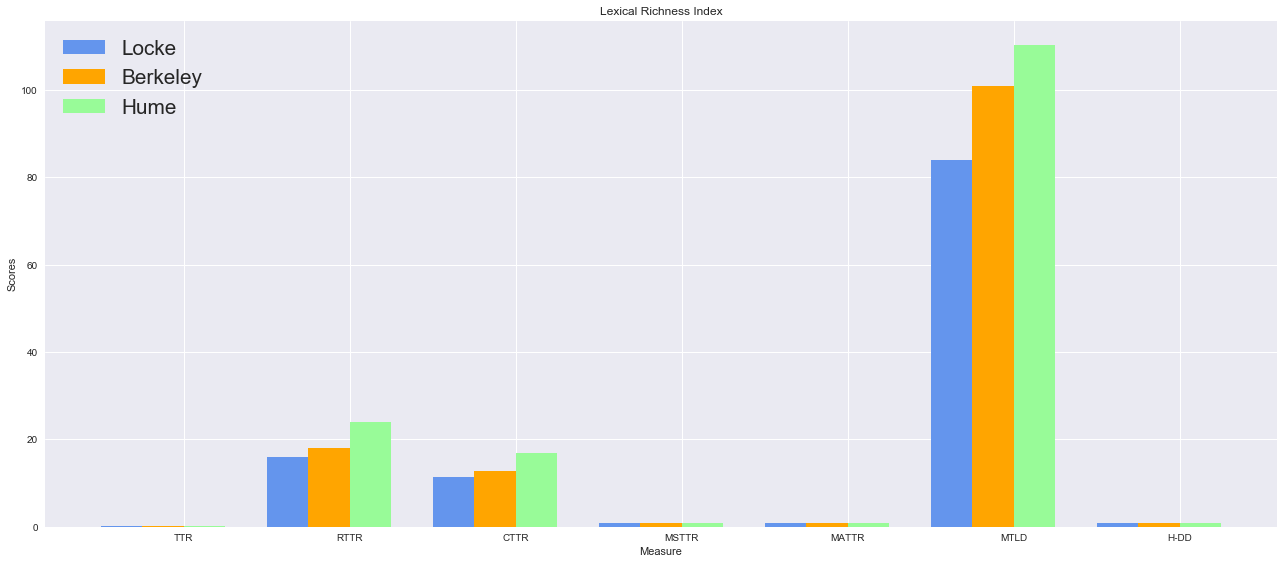

In [24]:
# Credit: Josh Hemann

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

%matplotlib inline

# Changes bar graph aesthetics
import seaborn as sns

sns.set()

n_groups = 7
    
Locke = (0.16, 16.03, 11.33, 0.88, 0.88, 84.02, 0.82)
Berkeley = (0.18, 18.14, 12.83, 0.89, 0.89, 100.85, 0.84)
Hume = (0.24, 23.98, 16.96, 0.89, 0.89, 110.33, 0.84)

fig, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)

ind = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(ind - bar_width, Locke, bar_width,
                color='cornflowerblue', label='Locke')

rects2 = ax.bar(ind, Berkeley, bar_width,
                color='orange', label='Berkeley')

rects3 = ax.bar(ind + bar_width, Hume, bar_width, 
                color='palegreen', label='Hume')
    
ax.set_xlabel('Measure')
ax.set_ylabel('Scores')
ax.set_title('Lexical Richness Index')
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(('TTR', 'RTTR', 'CTTR', 'MSTTR', 'MATTR', 'MTLD', 'H-DD'))
ax.legend(loc='upper left', fontsize='xx-large')

fig.tight_layout()
plt.show()

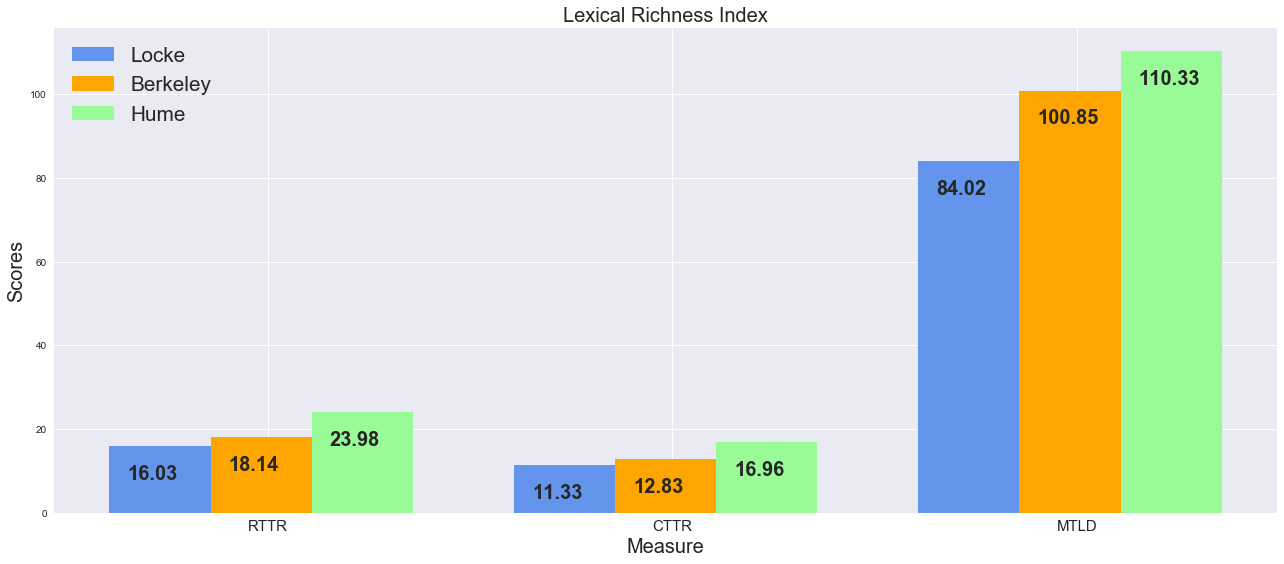

In [25]:
n_groups = 3
    
Locke = (16.03, 11.33, 84.02)
Berkeley = (18.14, 12.83, 100.85)
Hume = (23.98, 16.96, 110.33)

fig, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)

ind = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(ind - bar_width, Locke, bar_width,
                color='cornflowerblue', label='Locke')

rects2 = ax.bar(ind, Berkeley, bar_width,
                color='orange', label='Berkeley')

rects3 = ax.bar(ind + bar_width, Hume, bar_width, 
                color='palegreen', label='Hume')
    
ax.set_xlabel('Measure', fontsize=20)
ax.set_ylabel('Scores', fontsize=20)
ax.set_title('Lexical Richness Index', fontsize=20)
ax.set_xticks(ind + bar_width / 15)
ax.set_xticklabels(('RTTR', 'CTTR', 'MTLD'), fontsize=15)
ax.legend(loc='upper left', fontsize='xx-large')

# Plot values on bar graph
for a, b in zip(ind - bar_width, Locke):
    plt.text(a-.08, b-8, str(b), fontweight='bold', fontsize=20)

for a, b in zip(ind, Berkeley):
    plt.text(a-.08, b-8, str(b), fontweight='bold', fontsize=20)
    
for a, b in zip(ind + bar_width, Hume):
    plt.text(a-.08, b-8, str(b), fontweight='bold', fontsize=20)
    
fig.tight_layout()
plt.show()

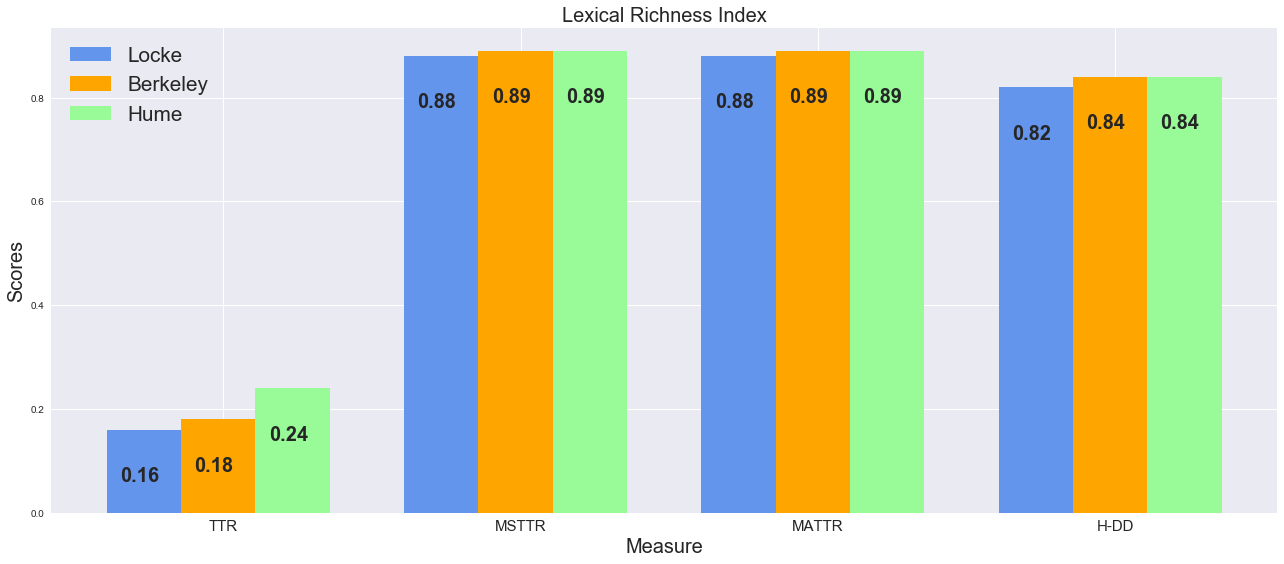

In [26]:
n_groups = 4

Locke = (0.16, 0.88, 0.88, 0.82)
Berkeley = (0.18, 0.89, 0.89, 0.84)
Hume = (0.24, 0.89, 0.89, 0.84)

fig, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)

ind = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(ind - bar_width, Locke, bar_width,
                color='cornflowerblue', label='Locke')

rects2 = ax.bar(ind, Berkeley, bar_width,
                color='orange', label='Berkeley')

rects3 = ax.bar(ind + bar_width, Hume, bar_width, 
                color='palegreen', label='Hume')
    
ax.set_xlabel('Measure', fontsize=20)
ax.set_ylabel('Scores', fontsize=20)
ax.set_title('Lexical Richness Index', fontsize=20)
ax.set_xticks(ind + bar_width / 15)
ax.set_xticklabels(('TTR', 'MSTTR', 'MATTR', 'H-DD'), fontsize=15)
ax.legend(loc='upper left', fontsize='xx-large')

# Plot values on bar graph
for a, b in zip(ind - bar_width, Locke):
    plt.text(a-.08, b-.1, str(b), fontweight='bold', fontsize=20)

for a, b in zip(ind, Berkeley):
    plt.text(a-.08, b-.1, str(b), fontweight='bold', fontsize=20)
    
for a, b in zip(ind + bar_width, Hume):
    plt.text(a-.08, b-.1, str(b), fontweight='bold', fontsize=20)
    
fig.tight_layout()
plt.show()

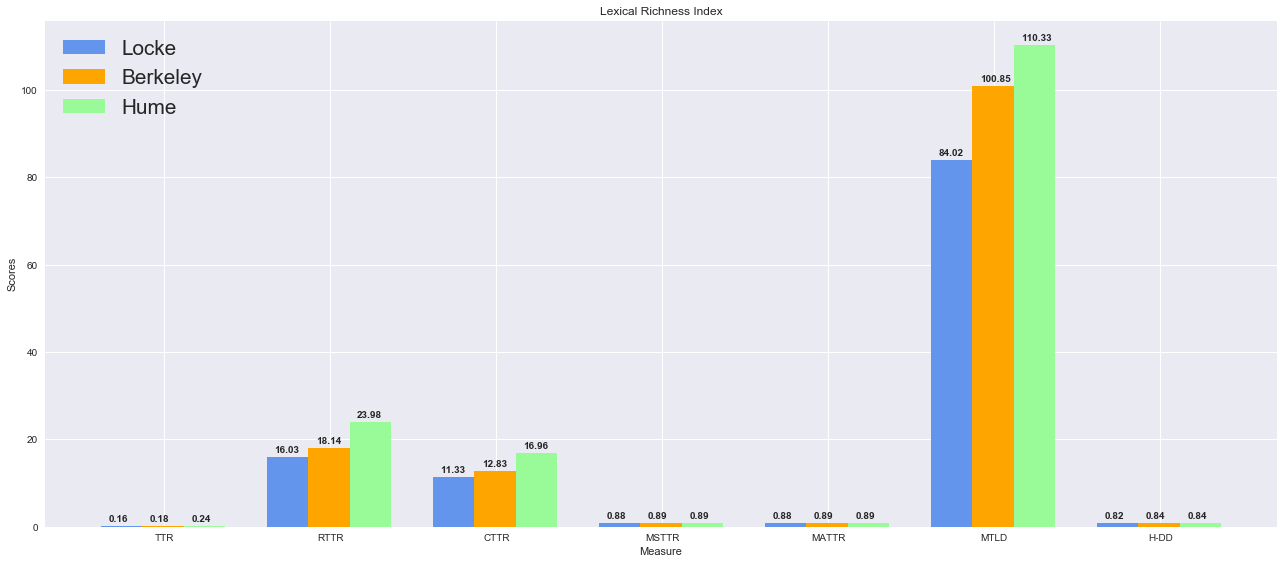

In [28]:
# Interactive visualization for HTML

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

%matplotlib inline

# Changes bar graph aesthetics
import seaborn as sns

sns.set()

n_groups = 7
    
Locke = (0.16, 16.03, 11.33, 0.88, 0.88, 84.02, 0.82)
Berkeley = (0.18, 18.14, 12.83, 0.89, 0.89, 100.85, 0.84)
Hume = (0.24, 23.98, 16.96, 0.89, 0.89, 110.33, 0.84)

fig, ax = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)

ind = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(ind - bar_width, Locke, bar_width,
                color='cornflowerblue', label='Locke')

rects2 = ax.bar(ind, Berkeley, bar_width,
                color='orange', label='Berkeley')

rects3 = ax.bar(ind + bar_width, Hume, bar_width, 
                color='palegreen', label='Hume')

# Plot values on bar graph
for a, b in zip(ind - bar_width, Locke):
    plt.text(a-.08, b+1, str(b), fontweight='bold', fontsize=10)

for a, b in zip(ind, Berkeley):
    plt.text(a-.08, b+1, str(b), fontweight='bold', fontsize=10)
    
for a, b in zip(ind + bar_width, Hume):
    plt.text(a-.08, b+1, str(b), fontweight='bold', fontsize=10)
    
ax.set_xlabel('Measure')
ax.set_ylabel('Scores')
ax.set_title('Lexical Richness Index')
ax.set_xticks(ind + bar_width / 35)
ax.set_xticklabels(('TTR', 'RTTR', 'CTTR', 'MSTTR', 'MATTR', 'MTLD', 'H-DD'))
ax.legend(loc='upper left', fontsize='xx-large')

fig.tight_layout()
plt.show()

In [30]:
# Export as HTML
import mpld3
mpld3.enable_notebook()
mpld3.save_html(fig,"lri.html")
mpld3.fig_to_html(fig,template_type="simple")
mpld3.disable_notebook()
mpld3.display()